# Exercise 1: Search for H -> gamma gamma

## Part 3:
* **Background-only hypothesis test**
    * Perform a fit to the background in order to get a stable background model.
    * Compare the data with the background model by plotting the **difference** in a sub-plot below the main plot.
---

To neglect fluctuations, we want to fit the background now to get a good background model, it looks very exponential:

 FCN=55.13 FROM MIGRAD    STATUS=CONVERGED     195 CALLS         196 TOTAL
                     EDM=9.21112e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.08110e+01   8.76850e+01  -2.05472e-01   3.02846e-05
   2  p1           1.19443e+01   1.22978e-02  -3.58586e-05  -7.02661e-02
   3  p2          -2.01293e-02   1.57061e-04   4.16136e-07   1.26766e+01


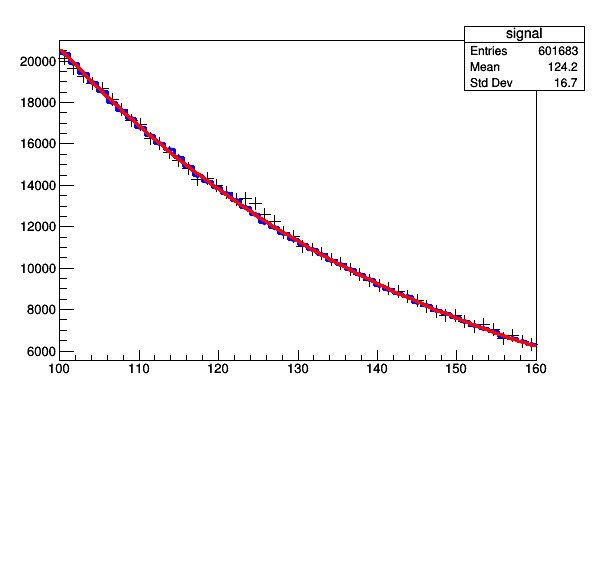

In [11]:
TF1 *fit = new TF1("f1", "[0] + exp([2]*x+[1])", -1, 12);
hBkg -> Fit(fit);
fit -> SetLineColor(kRed);
c->Draw();

Great, if we now look at the difference between data und background we should be able to see a possible signal, let's create a new histogram in which we store the difference:

In [12]:
TH1D *hDiff = (TH1D*)hData -> Clone(0);
int nBins = hData->GetNbinsX();

We need to loop over the bins and calculate the difference between data and fit for each bin. This is how you can get the information:

`hData->GetXaxis()->GetBinCenter(iBin);
hData->GetBinContent(iBin);
fit -> Eval(binCenter);`

In [13]:
for(int iBin = 1; iBin <= nBins; ++iBin){
    double binCenter   = hData->GetXaxis()->GetBinCenter(iBin);
    double dataValue   = hData->GetBinContent(iBin);
    double functionVal = fit -> Eval(binCenter);
    double difference  = dataValue - functionVal;
    hDiff -> SetBinContent(iBin, difference); 
}

Let's plot this in the second pad below the first one:

In [14]:
pad2 -> cd();

Make the histogram a bit nicer and draw:

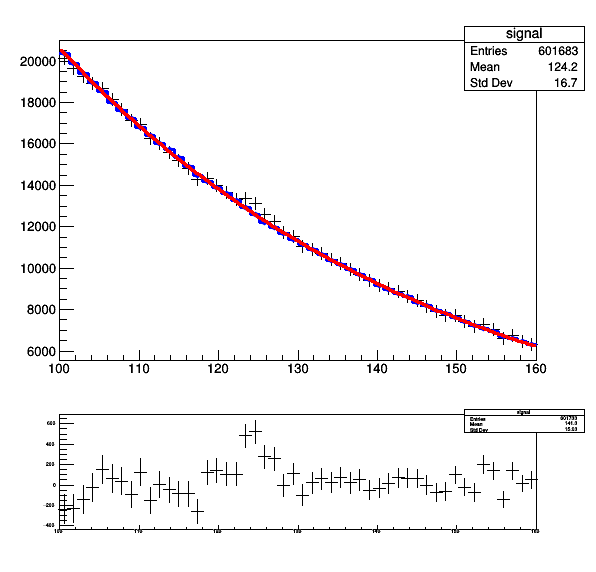

In [15]:
hDiff -> Draw();
c -> Draw();

In order to better visualize an excess or deficiency, we can draw a line at zero.

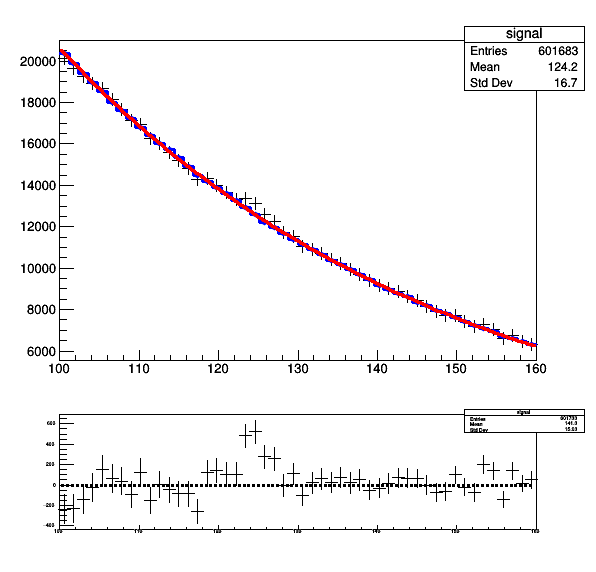

In [16]:
TF1 *zero = new TF1("zero", "0", 100, 160);
zero -> SetLineColor(kBlack);
zero -> SetLineWidth(3);
zero -> SetLineStyle(2);
zero -> Draw("SAME");
c->Draw();